In [1]:
import numpy as np
X = np.array([[0,0,1,1], [0,1,0,1]])
Y = np.array([[0,1,1,0]])
print('X.shape={}, Y.shape={}'.format(X.shape, Y.shape))
print(X)
print(Y)

X.shape=(2, 4), Y.shape=(1, 4)
[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


In [3]:
n_x = X.shape[0]
n_y = Y.shape[0]
n_h = 3
np.random.seed(1)
W1 = 2*np.random.random((n_h, n_x)) - 1
W2 = 2*np.random.random((n_y, n_h)) - 1

print("W1, {}".format(W1))
print("W2, {}".format(W2))

W1, [[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]]
W2, [[-0.62747958 -0.30887855 -0.20646505]]


In [11]:
class NeuralNetwork():
    def __init__(self, net_arch, eta=0.1, epochs=10000, random_seed=1):
        self.layers = len(net_arch)
        self.net_arch = net_arch
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
    
    def g(self, x):
        return 1/(1 + np.exp((-x)))
    
    def g_prime(self, x):
        return self.g(x) * (1 - self.g(x))
    
    def fit(self, X, Y):
        np.random.seed(self.random_seed)
        W1_shape = (self.net_arch[1], self.net_arch[0])
        W2_shape = (self.net_arch[2], self.net_arch[1])
        self.W1 = 2 * np.random.random(W1_shape) - 1
        self.W2 = 2 * np.random.random(W2_shape) - 1
        
        self.cost_ = []
        
        for _ in range(self.epochs):
            A0 = X
            z1 = np.dot(self.W1, A0)
            A1 = self.g(z1)
            z2 = np.dot(self.W2, A1)
            A2 = self.g(z2)
            
            E2 = Y - A2
            E1 = np.dot(self.W2.T, E2)
            
            dz2 = E2 * self.g_prime(z2)
            dz1 = E1 * self.g_prime(z1)
            
            self.W2 += np.dot(dz2, A1.T)
            self.W1 += np.dot(dz1, A0.T)
            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self
    
    def net_input(self, X):
        if X.shape[0] == self.w.shape[0]:
            return np.dot(X, self.w)
        else:
            return np.dot(X, self.w[1:]) + self.w[0]
        
    def predict(self, X):
        z1 = np.dot(self.W1, X)
        A1 = self.g(z1)
        z2 = np.dot(self.W2, A1)
        A2 = self.g(z2)
        
        return A2

In [16]:
nn = NeuralNetwork(net_arch=[2,4,1], epochs=1000)
X = np.array([[0,0,1,1], [0,1,0,1]])
Y = np.array([0,1,1,0])
nn.fit(X, Y)

print("Final prediction of all")
A2 = nn.predict(X)
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

Final prediction of all
[0 0] [0.077]
[0 1] [0.935]
[1 0] [0.94]
[1 1] [0.043]


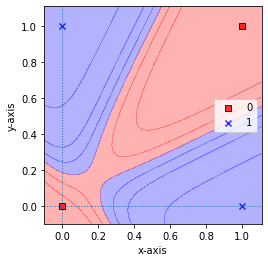

In [17]:
import joy
import matplotlib.pyplot as plt
joy.plot_decision_regions(X.T, Y, lambda z : nn.predict(z.T))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='best')
plt.show()

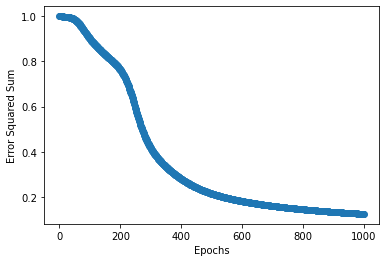

In [18]:
plt.plot(range(len(nn.cost_)), nn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()